
# Выполнил студент группы 18-АС Чумарина Е.А.

Задание: спрогнозировать продажную цену каждого объекта недвижимости
---



In [6]:
pip install keras_tuner

In [7]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/My Drive/train.csv")

data.fillna(data.mean(), inplace=True)
print(data)

          id   timestamp  ...  market_count_5000  price_doc
0          1  2011-08-20  ...                  4    5850000
1          2  2011-08-23  ...                 14    6000000
2          3  2011-08-27  ...                 10    5700000
3          4  2011-09-01  ...                  3   13100000
4          5  2011-09-05  ...                 14   16331452
...      ...         ...  ...                ...        ...
30466  30469  2015-06-30  ...                  6    7400000
30467  30470  2015-06-30  ...                 15   25000000
30468  30471  2015-06-30  ...                  1    6970959
30469  30472  2015-06-30  ...                  7   13500000
30470  30473  2015-06-30  ...                 10    5600000

[30471 rows x 292 columns]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


data.drop-удалить ненужные столбики


In [9]:
data.drop(['id','timestamp'], axis=1)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,Investment,Otradnoe

Удаляем все столбики где есть слова

In [10]:
dataC =data.drop(['id', 'timestamp', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'culture_objects_top_25'], axis=1)

In [11]:
dataC

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.00

переводим product_type и sub_area в числа

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataC.sub_area=le.fit_transform(dataC.sub_area)

In [13]:
ley = preprocessing.LabelEncoder()
dataC['sub_area']=ley.fit_transform(dataC['sub_area'])

In [14]:
leye = preprocessing.LabelEncoder()
dataC.product_type=leye.fit_transform(dataC.product_type)


In [15]:
dataC

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,0,82,1.005305e+07,175518,0.096270,0.300323,9753,5088.000000,4,10311,12721.000000,4,0,

fillna - преобразовывает NaN в 0

In [16]:
dataC.fillna(0)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.000000,5,10309,11065.000000,5,0,240.000000,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.000000,5,7759,6237.000000,8,0,229.000000,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.000000,4,6207,5580.000000,7,0,1183.000000,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.000000,9,13670,17063.000000,10,0,1190.738677,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.000000,7,6748,7770.000000,9,0,562.000000,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,0,82,1.005305e+07,175518,0.096270,0.300323,9753,5088.000000,4,10311,12721.000000,4,0,

In [17]:
X=dataC.drop(['price_doc'], axis=1)
y=dataC.price_doc

Подготовка данных

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train = X_train.apply(preprocessing.LabelEncoder().fit_transform)

In [20]:
X_test = X_test.apply(preprocessing.LabelEncoder().fit_transform)

Стандартизация данных

In [21]:
# Среднее значение
mean = X_train.mean(axis=0)
# Стандартное отклонение
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

Создание нейронной сети

In [22]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               71936     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 115,201
Trainable params: 115,201
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Обучение нейронной сети

In [25]:
history=model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2, validation_split=0.2)


Epoch 1/100
327/327 - 1s - loss: 49801148235776.0000 - mae: 5111029.0000 - val_loss: 18826827661312.0000 - val_mae: 2770413.7500
Epoch 2/100
327/327 - 1s - loss: 19273422471168.0000 - mae: 2549026.2500 - val_loss: 13128465121280.0000 - val_mae: 2234235.2500
Epoch 3/100
327/327 - 1s - loss: 15306118397952.0000 - mae: 2183311.0000 - val_loss: 10850132819968.0000 - val_mae: 2003742.3750
Epoch 4/100
327/327 - 1s - loss: 13310566072320.0000 - mae: 2006346.6250 - val_loss: 9799875952640.0000 - val_mae: 1884534.0000
Epoch 5/100
327/327 - 1s - loss: 12275810304000.0000 - mae: 1921993.7500 - val_loss: 9302033039360.0000 - val_mae: 1854371.2500
Epoch 6/100
327/327 - 1s - loss: 11641400852480.0000 - mae: 1874999.1250 - val_loss: 9000036859904.0000 - val_mae: 1812406.2500
Epoch 7/100
327/327 - 1s - loss: 11217306386432.0000 - mae: 1841695.6250 - val_loss: 8706724462592.0000 - val_mae: 1788983.1250
Epoch 8/100
327/327 - 1s - loss: 10796851527680.0000 - mae: 1809928.2500 - val_loss: 8608334479360.00

In [26]:
history

Графики loss и val_loss

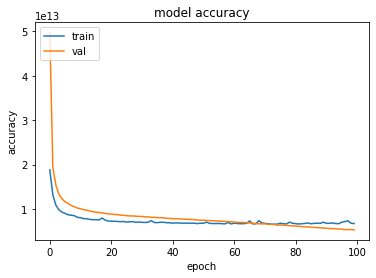

In [27]:
import keras 
from matplotlib import pyplot as plt 
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Графики mae и val_mae

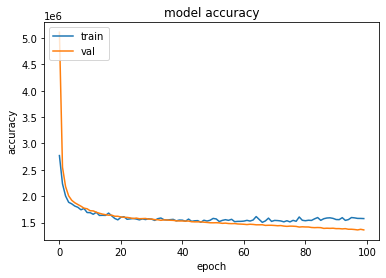

In [28]:
import keras 
from matplotlib import pyplot as plt 
plt.plot(history.history['val_mae'])
plt.plot(history.history['mae'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
history=model.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
511/511 [==============================] - 1s 3ms/step - loss: 5345160724480.0000 - mae: 1373821.1250 - val_loss: 7367319617536.0000 - val_mae: 1586626.1250
Epoch 2/10
511/511 [==============================] - 1s 2ms/step - loss: 5324137299968.0000 - mae: 1372881.5000 - val_loss: 6974058528768.0000 - val_mae: 1586531.0000
Epoch 3/10
511/511 [==============================] - 1s 3ms/step - loss: 5233424465920.0000 - mae: 1363753.6250 - val_loss: 6988156108800.0000 - val_mae: 1556332.8750
Epoch 4/10
511/511 [==============================] - 1s 3ms/step - loss: 5180243312640.0000 - mae: 1362076.2500 - val_loss: 6952605712384.0000 - val_mae: 1583186.1250
Epoch 5/10
511/511 [==============================] - 1s 3ms/step - loss: 5058872737792.0000 - mae: 1348164.7500 - val_loss: 7057092116480.0000 - val_mae: 1585924.5000
Epoch 6/10
511/511 [==============================] - 1s 3ms/step - loss: 5064024391680.0000 - mae: 1343325.1250 - val_loss: 7187596836864.0000 - val_mae: 16578

Выполняем предсказание для тестовой выборки

In [30]:
pred = model.predict(X_test)

Печатаем примеры результатов

In [32]:
predicted_x = np.reshape(pred, (pred.shape[0]))
predicted_y = np.reshape(y_test, (y_test.shape[0]))

In [33]:
for test_index in range(30):
  print("Предсказанная стоимость:", predicted_x[test_index],", правильная стоимость:",predicted_y.values[test_index])

Предсказанная стоимость: 14391735.0 , правильная стоимость: 12319849
Предсказанная стоимость: 7437803.5 , правильная стоимость: 6800000
Предсказанная стоимость: 6815665.5 , правильная стоимость: 4650000
Предсказанная стоимость: 9216884.0 , правильная стоимость: 1200000
Предсказанная стоимость: 10450726.0 , правильная стоимость: 5650000
Предсказанная стоимость: 12024172.0 , правильная стоимость: 10850000
Предсказанная стоимость: 4901596.0 , правильная стоимость: 3649323
Предсказанная стоимость: 8861268.0 , правильная стоимость: 4900000
Предсказанная стоимость: 10063517.0 , правильная стоимость: 9400000
Предсказанная стоимость: 4519526.0 , правильная стоимость: 3069381
Предсказанная стоимость: 7721276.5 , правильная стоимость: 6000000
Предсказанная стоимость: 13874820.0 , правильная стоимость: 13950000
Предсказанная стоимость: 17017870.0 , правильная стоимость: 16350000
Предсказанная стоимость: 8112872.5 , правильная стоимость: 2100000
Предсказанная стоимость: 8221878.5 , правильная стои

Коэффициент корреляции

In [34]:
cc = np.corrcoef(predicted_x, predicted_y)
ccc = cc[0][1]
print(f'Коэффициент корреляции: {ccc}')

Коэффициент корреляции: 0.7190510282250981


keras

In [35]:
def build_model(hp):
  hidden_layers = hp.Choice('hidden_layers', values=[1,2,3])
  activation_choice = hp.Choice('activation', values=['relu', 'selu', 'elu'])
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=256,max_value=5059,step=768),activation=activation_choice, input_shape=(X_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hidden_layers):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=237//(i+1), max_value=1264//(i+1),step=316//(i+1)),activation=activation_choice))
  model.add(Dense(1))  
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  return model

In [36]:
! rm -rf untitled_project/

In [37]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Dropout
def find_best_NN(X_train, y_train):
  # создаю тюнер, который сможет подобрать оптимальную архитектуру модели
  tuner = RandomSearch(build_model, objective="val_mae", max_trials=40, executions_per_trial=1,)
  print("\n\n\n")
  # начинается автоматический подбор гиперпараметров
  print('[INFO] start searching')
  tuner.search(X_train, y_train, batch_size=50, epochs=10, validation_split=0.2)
  # выбираем лучшую модель
  print("\n\n\nRESULTS SUMMARY")
  tuner.results_summary()
  print("\n\n\n")
  # получаем лучшую модель
  print("\n\n\nHERE IS THE BEST MODEL\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model

best_model = find_best_NN(X_train, y_train)





[INFO] start searching
Epoch 1/10
327/327 [==============================] - 12s 38ms/step - loss: 69916493348864.0000 - mae: 6729321.5000 - val_loss: 51158450176000.0000 - val_mae: 5656830.0000
Epoch 2/10
327/327 [==============================] - 12s 36ms/step - loss: 39081706782720.0000 - mae: 4259224.5000 - val_loss: 23271948943360.0000 - val_mae: 3115592.5000
Epoch 3/10
327/327 [==============================] - 12s 37ms/step - loss: 24009156591616.0000 - mae: 2931521.7500 - val_loss: 17831169097728.0000 - val_mae: 2632293.2500
Epoch 4/10
327/327 [==============================] - 12s 36ms/step - loss: 20430123433984.0000 - mae: 2624440.5000 - val_loss: 15209558179840.0000 - val_mae: 2401042.0000
Epoch 5/10
327/327 [==============================] - 12s 36ms/step - loss: 18157089587200.0000 - mae: 2418084.5000 - val_loss: 13400684888064.0000 - val_mae: 2236940.7500
Epoch 6/10
327/327 [==============================] - 12s 36ms/step - loss: 16470479208448.0000 - mae: 2272220.50

Epoch 1/10
327/327 [==============================] - 13s 38ms/step - loss: 42905213337600.0000 - mae: 4559705.5000 - val_loss: 17686761308160.0000 - val_mae: 2662102.2500
Epoch 2/10
327/327 [==============================] - 12s 37ms/step - loss: 18384234217472.0000 - mae: 2461909.2500 - val_loss: 12267872583680.0000 - val_mae: 2113396.7500
Epoch 3/10
327/327 [==============================] - 12s 37ms/step - loss: 14381886734336.0000 - mae: 2093131.8750 - val_loss: 10057483812864.0000 - val_mae: 1896285.0000
Epoch 4/10
327/327 [==============================] - 12s 37ms/step - loss: 12405423734784.0000 - mae: 1933749.5000 - val_loss: 9276652257280.0000 - val_mae: 1829865.0000
Epoch 5/10
327/327 [==============================] - 12s 37ms/step - loss: 11573337784320.0000 - mae: 1862087.6250 - val_loss: 8767477907456.0000 - val_mae: 1777812.3750
Epoch 6/10
327/327 [==============================] - 12s 37ms/step - loss: 11008660733952.0000 - mae: 1806591.1250 - val_loss: 8625678974976.

Epoch 1/10
327/327 [==============================] - 34s 104ms/step - loss: 30715179696128.0000 - mae: 3509075.0000 - val_loss: 12681077587968.0000 - val_mae: 2143495.5000
Epoch 2/10
327/327 [==============================] - 34s 104ms/step - loss: 13986412101632.0000 - mae: 2056458.5000 - val_loss: 9564789407744.0000 - val_mae: 1859054.0000
Epoch 3/10
327/327 [==============================] - 40s 121ms/step - loss: 11707563900928.0000 - mae: 1872208.7500 - val_loss: 8658241454080.0000 - val_mae: 1757113.7500
Epoch 4/10
327/327 [==============================] - 35s 106ms/step - loss: 10844552298496.0000 - mae: 1796787.2500 - val_loss: 8269807484928.0000 - val_mae: 1707187.0000
Epoch 5/10
327/327 [==============================] - 34s 105ms/step - loss: 10338814656512.0000 - mae: 1749251.7500 - val_loss: 7925854633984.0000 - val_mae: 1679994.2500
Epoch 6/10
327/327 [==============================] - 35s 106ms/step - loss: 9970376507392.0000 - mae: 1706126.7500 - val_loss: 78778146488

Epoch 1/10
327/327 [==============================] - 13s 38ms/step - loss: 72145686233088.0000 - mae: 6938433.5000 - val_loss: 58302603984896.0000 - val_mae: 6360062.5000
Epoch 2/10
327/327 [==============================] - 12s 38ms/step - loss: 51036823748608.0000 - mae: 5597351.0000 - val_loss: 36316129525760.0000 - val_mae: 4718260.0000
Epoch 3/10
327/327 [==============================] - 12s 38ms/step - loss: 35102530732032.0000 - mae: 4350207.5000 - val_loss: 28760254447616.0000 - val_mae: 4091790.0000
Epoch 4/10
327/327 [==============================] - 12s 38ms/step - loss: 29877952577536.0000 - mae: 3882866.0000 - val_loss: 23932813967360.0000 - val_mae: 3577306.0000
Epoch 5/10
327/327 [==============================] - 13s 39ms/step - loss: 25250341322752.0000 - mae: 3371389.2500 - val_loss: 19510698442752.0000 - val_mae: 3047030.7500
Epoch 6/10
327/327 [==============================] - 12s 38ms/step - loss: 21671706624000.0000 - mae: 2965666.2500 - val_loss: 169430661201

Epoch 1/10
327/327 [==============================] - 20s 61ms/step - loss: 72604845080576.0000 - mae: 6953059.5000 - val_loss: 59145025748992.0000 - val_mae: 6381780.5000
Epoch 2/10
327/327 [==============================] - 20s 61ms/step - loss: 50927939616768.0000 - mae: 5516684.0000 - val_loss: 34325890334720.0000 - val_mae: 4524845.5000
Epoch 3/10
327/327 [==============================] - 20s 61ms/step - loss: 32618902978560.0000 - mae: 4065276.0000 - val_loss: 25329670291456.0000 - val_mae: 3682827.5000
Epoch 4/10
327/327 [==============================] - 20s 61ms/step - loss: 26349135724544.0000 - mae: 3388927.2500 - val_loss: 20216442519552.0000 - val_mae: 3016290.5000
Epoch 5/10
327/327 [==============================] - 20s 61ms/step - loss: 22776144461824.0000 - mae: 2980459.7500 - val_loss: 17942834053120.0000 - val_mae: 2790775.0000
Epoch 6/10
327/327 [==============================] - 20s 61ms/step - loss: 20972400803840.0000 - mae: 2822812.7500 - val_loss: 164460977192

Epoch 1/10
327/327 [==============================] - 10s 31ms/step - loss: 71290014662656.0000 - mae: 6818456.5000 - val_loss: 54310624821248.0000 - val_mae: 5885543.5000
Epoch 2/10
327/327 [==============================] - 10s 31ms/step - loss: 42388525416448.0000 - mae: 4516300.5000 - val_loss: 24858857570304.0000 - val_mae: 3242276.5000
Epoch 3/10
327/327 [==============================] - 10s 31ms/step - loss: 25079180165120.0000 - mae: 3003192.7500 - val_loss: 18561076559872.0000 - val_mae: 2673334.7500
Epoch 4/10
327/327 [==============================] - 10s 31ms/step - loss: 21123248947200.0000 - mae: 2671354.7500 - val_loss: 15790509129728.0000 - val_mae: 2444877.5000
Epoch 5/10
327/327 [==============================] - 10s 31ms/step - loss: 18847371362304.0000 - mae: 2470737.5000 - val_loss: 13956302241792.0000 - val_mae: 2278071.2500
Epoch 6/10
327/327 [==============================] - 10s 31ms/step - loss: 17076210106368.0000 - mae: 2317591.5000 - val_loss: 125819420672

Epoch 1/10
327/327 [==============================] - 11s 35ms/step - loss: 42120350007296.0000 - mae: 4635747.5000 - val_loss: 19360697548800.0000 - val_mae: 2868012.2500
Epoch 2/10
327/327 [==============================] - 12s 35ms/step - loss: 19452106113024.0000 - mae: 2719484.2500 - val_loss: 13548372623360.0000 - val_mae: 2432955.5000
Epoch 3/10
327/327 [==============================] - 12s 35ms/step - loss: 15031175479296.0000 - mae: 2339366.0000 - val_loss: 11333301960704.0000 - val_mae: 2165237.7500
Epoch 4/10
327/327 [==============================] - 12s 35ms/step - loss: 13269606596608.0000 - mae: 2174393.2500 - val_loss: 10156360335360.0000 - val_mae: 2029266.3750
Epoch 5/10
327/327 [==============================] - 11s 34ms/step - loss: 12089813893120.0000 - mae: 2034105.7500 - val_loss: 9235555418112.0000 - val_mae: 1890063.0000
Epoch 6/10
327/327 [==============================] - 11s 34ms/step - loss: 11031495573504.0000 - mae: 1883780.1250 - val_loss: 8508533112832

Epoch 1/10
327/327 [==============================] - 23s 70ms/step - loss: 39429594939392.0000 - mae: 4379582.5000 - val_loss: 17895109165056.0000 - val_mae: 2831003.2500
Epoch 2/10
327/327 [==============================] - 23s 70ms/step - loss: 17967681110016.0000 - mae: 2578045.7500 - val_loss: 12280772165632.0000 - val_mae: 2246556.0000
Epoch 3/10
327/327 [==============================] - 23s 70ms/step - loss: 14169048875008.0000 - mae: 2240850.0000 - val_loss: 10565010325504.0000 - val_mae: 2095469.2500
Epoch 4/10
327/327 [==============================] - 23s 70ms/step - loss: 12420682612736.0000 - mae: 2064832.1250 - val_loss: 9404204187648.0000 - val_mae: 1922553.6250
Epoch 5/10
327/327 [==============================] - 22s 68ms/step - loss: 11298986262528.0000 - mae: 1915479.5000 - val_loss: 8941748617216.0000 - val_mae: 1808828.1250
Epoch 6/10
327/327 [==============================] - 23s 69ms/step - loss: 10555862548480.0000 - mae: 1810700.8750 - val_loss: 8666808320000.

Epoch 1/10
327/327 [==============================] - 11s 32ms/step - loss: 43329626570752.0000 - mae: 4578167.5000 - val_loss: 17968633217024.0000 - val_mae: 2664073.5000
Epoch 2/10
327/327 [==============================] - 10s 31ms/step - loss: 18507997642752.0000 - mae: 2449759.7500 - val_loss: 12184883036160.0000 - val_mae: 2114410.5000
Epoch 3/10
327/327 [==============================] - 10s 32ms/step - loss: 14412314312704.0000 - mae: 2081349.1250 - val_loss: 10125574144000.0000 - val_mae: 1918870.3750
Epoch 4/10
327/327 [==============================] - 10s 32ms/step - loss: 12634715848704.0000 - mae: 1933159.8750 - val_loss: 9369934626816.0000 - val_mae: 1842203.5000
Epoch 5/10
327/327 [==============================] - 11s 32ms/step - loss: 11736227774464.0000 - mae: 1867956.7500 - val_loss: 8956150808576.0000 - val_mae: 1815487.0000
Epoch 6/10
327/327 [==============================] - 10s 32ms/step - loss: 11083297325056.0000 - mae: 1815651.8750 - val_loss: 8640624852992.

Epoch 1/10
327/327 [==============================] - 20s 63ms/step - loss: 32413323362304.0000 - mae: 3665256.5000 - val_loss: 13385106194432.0000 - val_mae: 2229907.5000
Epoch 2/10
327/327 [==============================] - 20s 61ms/step - loss: 14495675056128.0000 - mae: 2120497.5000 - val_loss: 9790254219264.0000 - val_mae: 1904949.5000
Epoch 3/10
327/327 [==============================] - 20s 61ms/step - loss: 11924719796224.0000 - mae: 1894468.8750 - val_loss: 8852236926976.0000 - val_mae: 1811221.6250
Epoch 4/10
327/327 [==============================] - 20s 61ms/step - loss: 11039427002368.0000 - mae: 1819912.6250 - val_loss: 8711309885440.0000 - val_mae: 1803173.1250
Epoch 5/10
327/327 [==============================] - 20s 62ms/step - loss: 10500544921600.0000 - mae: 1767482.6250 - val_loss: 8074969481216.0000 - val_mae: 1689698.0000
Epoch 6/10
327/327 [==============================] - 20s 61ms/step - loss: 10091931631616.0000 - mae: 1726588.7500 - val_loss: 7813206638592.00

Epoch 1/10
327/327 [==============================] - 14s 42ms/step - loss: 44513988968448.0000 - mae: 5021546.0000 - val_loss: 24465930977280.0000 - val_mae: 3703673.0000
Epoch 2/10
327/327 [==============================] - 13s 41ms/step - loss: 21158896336896.0000 - mae: 2957922.5000 - val_loss: 13679821062144.0000 - val_mae: 2411234.2500
Epoch 3/10
327/327 [==============================] - 13s 41ms/step - loss: 15346034540544.0000 - mae: 2340785.2500 - val_loss: 11084373164032.0000 - val_mae: 2126432.5000
Epoch 4/10
327/327 [==============================] - 14s 42ms/step - loss: 13351830683648.0000 - mae: 2179226.7500 - val_loss: 10100464943104.0000 - val_mae: 2050431.2500
Epoch 5/10
327/327 [==============================] - 13s 41ms/step - loss: 12417636499456.0000 - mae: 2102081.5000 - val_loss: 9608993177600.0000 - val_mae: 1993985.2500
Epoch 6/10
327/327 [==============================] - 14s 42ms/step - loss: 11824614342656.0000 - mae: 2049503.3750 - val_loss: 9392582819840

Epoch 1/10
327/327 [==============================] - 36s 109ms/step - loss: 60472602656768.0000 - mae: 5912826.0000 - val_loss: 30031787065344.0000 - val_mae: 3709319.5000
Epoch 2/10
327/327 [==============================] - 36s 110ms/step - loss: 25225626386432.0000 - mae: 2995852.5000 - val_loss: 17278392336384.0000 - val_mae: 2563322.2500
Epoch 3/10
327/327 [==============================] - 36s 110ms/step - loss: 19405291388928.0000 - mae: 2503790.0000 - val_loss: 13797053956096.0000 - val_mae: 2236554.7500
Epoch 4/10
327/327 [==============================] - 36s 109ms/step - loss: 16615555989504.0000 - mae: 2245580.0000 - val_loss: 11858048188416.0000 - val_mae: 2069190.2500
Epoch 5/10
327/327 [==============================] - 35s 108ms/step - loss: 14813849714688.0000 - mae: 2088466.0000 - val_loss: 10704594665472.0000 - val_mae: 1938194.2500
Epoch 6/10
327/327 [==============================] - 36s 109ms/step - loss: 13719009492992.0000 - mae: 1998857.6250 - val_loss: 101214

Epoch 1/10
327/327 [==============================] - 20s 61ms/step - loss: 28188482732032.0000 - mae: 3485995.7500 - val_loss: 13217500758016.0000 - val_mae: 2361621.0000
Epoch 2/10
327/327 [==============================] - 20s 61ms/step - loss: 14396321431552.0000 - mae: 2272005.2500 - val_loss: 10321900077056.0000 - val_mae: 2078175.3750
Epoch 3/10
327/327 [==============================] - 20s 62ms/step - loss: 12367218868224.0000 - mae: 2089008.3750 - val_loss: 9227714166784.0000 - val_mae: 1952287.5000
Epoch 4/10
327/327 [==============================] - 20s 61ms/step - loss: 11175924334592.0000 - mae: 1937495.5000 - val_loss: 8298871914496.0000 - val_mae: 1741469.3750
Epoch 5/10
327/327 [==============================] - 20s 61ms/step - loss: 10282358276096.0000 - mae: 1809751.3750 - val_loss: 7783280803840.0000 - val_mae: 1679325.1250
Epoch 6/10
327/327 [==============================] - 20s 61ms/step - loss: 9721012551680.0000 - mae: 1730738.7500 - val_loss: 7564282560512.00

Epoch 1/10
327/327 [==============================] - 26s 79ms/step - loss: 68851807027200.0000 - mae: 6733273.0000 - val_loss: 50702336393216.0000 - val_mae: 5886565.5000
Epoch 2/10
327/327 [==============================] - 26s 80ms/step - loss: 41454432944128.0000 - mae: 4840529.0000 - val_loss: 29522720194560.0000 - val_mae: 4134750.7500
Epoch 3/10
327/327 [==============================] - 26s 79ms/step - loss: 29302890430464.0000 - mae: 3773716.7500 - val_loss: 22359157243904.0000 - val_mae: 3325246.5000
Epoch 4/10
327/327 [==============================] - 26s 80ms/step - loss: 23554313682944.0000 - mae: 3103064.2500 - val_loss: 17957753192448.0000 - val_mae: 2785747.2500
Epoch 5/10
327/327 [==============================] - 26s 80ms/step - loss: 20573686071296.0000 - mae: 2816365.0000 - val_loss: 16101309153280.0000 - val_mae: 2649694.2500
Epoch 6/10
327/327 [==============================] - 26s 80ms/step - loss: 18837089026048.0000 - mae: 2670617.2500 - val_loss: 146211927490

Epoch 1/10
327/327 [==============================] - 10s 32ms/step - loss: 30083362324480.0000 - mae: 3528929.5000 - val_loss: 15007422087168.0000 - val_mae: 2456329.0000
Epoch 2/10
327/327 [==============================] - 10s 31ms/step - loss: 15972943527936.0000 - mae: 2382214.0000 - val_loss: 11156132462592.0000 - val_mae: 2140734.7500
Epoch 3/10
327/327 [==============================] - 10s 31ms/step - loss: 13016032608256.0000 - mae: 2150494.7500 - val_loss: 9703697416192.0000 - val_mae: 2015736.2500
Epoch 4/10
327/327 [==============================] - 10s 31ms/step - loss: 11414304456704.0000 - mae: 1958957.7500 - val_loss: 8729227952128.0000 - val_mae: 1859811.1250
Epoch 5/10
327/327 [==============================] - 10s 31ms/step - loss: 10305678606336.0000 - mae: 1812889.3750 - val_loss: 8186897629184.0000 - val_mae: 1743486.3750
Epoch 6/10
327/327 [==============================] - 10s 31ms/step - loss: 9906873696256.0000 - mae: 1747639.8750 - val_loss: 7630878146560.00

Epoch 1/10
327/327 [==============================] - 38s 118ms/step - loss: 28970951114752.0000 - mae: 3323966.7500 - val_loss: 16221647929344.0000 - val_mae: 2489977.5000
Epoch 2/10
327/327 [==============================] - 38s 117ms/step - loss: 17276082323456.0000 - mae: 2417572.0000 - val_loss: 11290119503872.0000 - val_mae: 2185084.5000
Epoch 3/10
327/327 [==============================] - 38s 117ms/step - loss: 12486113755136.0000 - mae: 2050622.3750 - val_loss: 8851207225344.0000 - val_mae: 1896260.0000
Epoch 4/10
327/327 [==============================] - 39s 118ms/step - loss: 10696944254976.0000 - mae: 1828290.6250 - val_loss: 7989098446848.0000 - val_mae: 1723766.6250
Epoch 5/10
327/327 [==============================] - 38s 117ms/step - loss: 10028723470336.0000 - mae: 1762526.1250 - val_loss: 7488852197376.0000 - val_mae: 1608457.3750
Epoch 6/10
327/327 [==============================] - 39s 118ms/step - loss: 9545377120256.0000 - mae: 1715039.0000 - val_loss: 7533827194

Epoch 1/10
327/327 [==============================] - 4s 14ms/step - loss: 60964284137472.0000 - mae: 6207985.5000 - val_loss: 33142085779456.0000 - val_mae: 4462064.0000
Epoch 2/10
327/327 [==============================] - 4s 13ms/step - loss: 32081319034880.0000 - mae: 4115450.0000 - val_loss: 23813825757184.0000 - val_mae: 3592951.5000
Epoch 3/10
327/327 [==============================] - 4s 13ms/step - loss: 22252783403008.0000 - mae: 3088830.0000 - val_loss: 15506847301632.0000 - val_mae: 2599956.7500
Epoch 4/10
327/327 [==============================] - 4s 13ms/step - loss: 17549480689664.0000 - mae: 2565347.5000 - val_loss: 12939708858368.0000 - val_mae: 2338052.2500
Epoch 5/10
327/327 [==============================] - 4s 13ms/step - loss: 15335366328320.0000 - mae: 2359767.2500 - val_loss: 11545386942464.0000 - val_mae: 2196088.5000
Epoch 6/10
327/327 [==============================] - 4s 13ms/step - loss: 14182050168832.0000 - mae: 2257883.2500 - val_loss: 10794015129600.000

Epoch 1/10
327/327 [==============================] - 6s 19ms/step - loss: 74117034278912.0000 - mae: 7054237.5000 - val_loss: 63795816824832.0000 - val_mae: 6700660.0000
Epoch 2/10
327/327 [==============================] - 6s 19ms/step - loss: 60025271746560.0000 - mae: 6220646.5000 - val_loss: 45745956716544.0000 - val_mae: 5536791.0000
Epoch 3/10
327/327 [==============================] - 6s 19ms/step - loss: 41597345464320.0000 - mae: 4899715.5000 - val_loss: 33471321866240.0000 - val_mae: 4511528.5000
Epoch 4/10
327/327 [==============================] - 6s 19ms/step - loss: 35531652071424.0000 - mae: 4429664.5000 - val_loss: 31081969483776.0000 - val_mae: 4323969.5000
Epoch 5/10
327/327 [==============================] - 6s 19ms/step - loss: 33333578825728.0000 - mae: 4281094.0000 - val_loss: 28918302113792.0000 - val_mae: 4155705.5000
Epoch 6/10
327/327 [==============================] - 6s 19ms/step - loss: 31179010998272.0000 - mae: 4119121.2500 - val_loss: 26941302243328.000

Epoch 1/10
327/327 [==============================] - 22s 66ms/step - loss: 65840644882432.0000 - mae: 6417462.0000 - val_loss: 41005977960448.0000 - val_mae: 4767527.0000
Epoch 2/10
327/327 [==============================] - 21s 65ms/step - loss: 30996640563200.0000 - mae: 3522191.2500 - val_loss: 19816681308160.0000 - val_mae: 2804464.5000
Epoch 3/10
327/327 [==============================] - 21s 64ms/step - loss: 21584798547968.0000 - mae: 2715444.2500 - val_loss: 15806655102976.0000 - val_mae: 2446129.5000
Epoch 4/10
327/327 [==============================] - 21s 64ms/step - loss: 18453834498048.0000 - mae: 2443098.2500 - val_loss: 13481465085952.0000 - val_mae: 2240856.2500
Epoch 5/10
327/327 [==============================] - 21s 65ms/step - loss: 16404454572032.0000 - mae: 2259423.2500 - val_loss: 11947224334336.0000 - val_mae: 2070896.7500
Epoch 6/10
327/327 [==============================] - 21s 64ms/step - loss: 14935922835456.0000 - mae: 2122111.7500 - val_loss: 109222266142

Epoch 1/10
327/327 [==============================] - 14s 44ms/step - loss: 30384949559296.0000 - mae: 3567141.0000 - val_loss: 13934241251328.0000 - val_mae: 2375413.2500
Epoch 2/10
327/327 [==============================] - 14s 43ms/step - loss: 14317313327104.0000 - mae: 2195381.5000 - val_loss: 9713111531520.0000 - val_mae: 1958042.6250
Epoch 3/10
327/327 [==============================] - 14s 44ms/step - loss: 11465651126272.0000 - mae: 1899108.3750 - val_loss: 8852150943744.0000 - val_mae: 1860215.7500
Epoch 4/10
327/327 [==============================] - 14s 44ms/step - loss: 10516308164608.0000 - mae: 1801442.8750 - val_loss: 8102275973120.0000 - val_mae: 1754750.6250
Epoch 5/10
327/327 [==============================] - 14s 43ms/step - loss: 9910202925056.0000 - mae: 1735608.6250 - val_loss: 7892981252096.0000 - val_mae: 1690840.2500
Epoch 6/10
327/327 [==============================] - 14s 43ms/step - loss: 9578937843712.0000 - mae: 1711219.7500 - val_loss: 7715732062208.0000

Epoch 1/10
327/327 [==============================] - 15s 45ms/step - loss: 28311149346816.0000 - mae: 3401409.7500 - val_loss: 14180279123968.0000 - val_mae: 2404527.5000
Epoch 2/10
327/327 [==============================] - 14s 44ms/step - loss: 15192973901824.0000 - mae: 2335579.2500 - val_loss: 11152503341056.0000 - val_mae: 2152492.2500
Epoch 3/10
327/327 [==============================] - 14s 43ms/step - loss: 12781446234112.0000 - mae: 2128212.5000 - val_loss: 9379363422208.0000 - val_mae: 1918744.2500
Epoch 4/10
327/327 [==============================] - 14s 44ms/step - loss: 11277249282048.0000 - mae: 1934621.0000 - val_loss: 8794918092800.0000 - val_mae: 1944307.1250
Epoch 5/10
327/327 [==============================] - 15s 45ms/step - loss: 10402715926528.0000 - mae: 1814264.3750 - val_loss: 7782822051840.0000 - val_mae: 1711405.3750
Epoch 6/10
327/327 [==============================] - 14s 44ms/step - loss: 10041798164480.0000 - mae: 1750702.1250 - val_loss: 8488184971264.0

Epoch 1/10
327/327 [==============================] - 19s 60ms/step - loss: 39270454657024.0000 - mae: 4282638.0000 - val_loss: 18588700246016.0000 - val_mae: 2887779.0000
Epoch 2/10
327/327 [==============================] - 19s 59ms/step - loss: 18323026739200.0000 - mae: 2605069.7500 - val_loss: 12173219725312.0000 - val_mae: 2263406.2500
Epoch 3/10
327/327 [==============================] - 19s 59ms/step - loss: 13692816064512.0000 - mae: 2159326.0000 - val_loss: 9896412053504.0000 - val_mae: 1959032.7500
Epoch 4/10
327/327 [==============================] - 19s 59ms/step - loss: 11989989457920.0000 - mae: 1979327.8750 - val_loss: 9115624538112.0000 - val_mae: 1829289.8750
Epoch 5/10
327/327 [==============================] - 19s 59ms/step - loss: 11000015224832.0000 - mae: 1850421.7500 - val_loss: 8461424263168.0000 - val_mae: 1771244.8750
Epoch 6/10
327/327 [==============================] - 19s 59ms/step - loss: 10505926213632.0000 - mae: 1795783.6250 - val_loss: 8104774205440.0

Epoch 1/10
327/327 [==============================] - 25s 76ms/step - loss: 28528454139904.0000 - mae: 3437624.2500 - val_loss: 12825684606976.0000 - val_mae: 2323485.7500
Epoch 2/10
327/327 [==============================] - 22s 67ms/step - loss: 13654279847936.0000 - mae: 2162658.5000 - val_loss: 9466544128000.0000 - val_mae: 1890503.8750
Epoch 3/10
327/327 [==============================] - 21s 66ms/step - loss: 11249303683072.0000 - mae: 1871811.5000 - val_loss: 8473921716224.0000 - val_mae: 1754899.8750
Epoch 4/10
327/327 [==============================] - 21s 66ms/step - loss: 10476237881344.0000 - mae: 1783725.5000 - val_loss: 8011503370240.0000 - val_mae: 1721470.5000
Epoch 5/10
327/327 [==============================] - 21s 66ms/step - loss: 9925390499840.0000 - mae: 1730800.1250 - val_loss: 7653776949248.0000 - val_mae: 1617887.7500
Epoch 6/10
327/327 [==============================] - 21s 66ms/step - loss: 9638081724416.0000 - mae: 1703767.0000 - val_loss: 7540445282304.0000

Epoch 1/10
327/327 [==============================] - 7s 20ms/step - loss: 52409174851584.0000 - mae: 5336526.5000 - val_loss: 23801268011008.0000 - val_mae: 3247383.5000
Epoch 2/10
327/327 [==============================] - 7s 20ms/step - loss: 24067893624832.0000 - mae: 3077456.7500 - val_loss: 17076670431232.0000 - val_mae: 2709216.0000
Epoch 3/10
327/327 [==============================] - 6s 20ms/step - loss: 18311676952576.0000 - mae: 2590767.0000 - val_loss: 12536389828608.0000 - val_mae: 2241105.5000
Epoch 4/10
327/327 [==============================] - 6s 19ms/step - loss: 14637268467712.0000 - mae: 2224952.0000 - val_loss: 10505492103168.0000 - val_mae: 2008502.2500
Epoch 5/10
327/327 [==============================] - 6s 20ms/step - loss: 12853319827456.0000 - mae: 2049349.1250 - val_loss: 9646774419456.0000 - val_mae: 1906958.2500
Epoch 6/10
327/327 [==============================] - 7s 20ms/step - loss: 11918062387200.0000 - mae: 1948509.3750 - val_loss: 9127786971136.0000 

Epoch 1/10
327/327 [==============================] - 23s 70ms/step - loss: 45732551720960.0000 - mae: 4926992.0000 - val_loss: 20667919499264.0000 - val_mae: 2990206.5000
Epoch 2/10
327/327 [==============================] - 23s 70ms/step - loss: 21053512351744.0000 - mae: 2855501.0000 - val_loss: 14644645199872.0000 - val_mae: 2512850.2500
Epoch 3/10
327/327 [==============================] - 23s 71ms/step - loss: 16188629319680.0000 - mae: 2438276.0000 - val_loss: 11917995278336.0000 - val_mae: 2232552.5000
Epoch 4/10
327/327 [==============================] - 22s 68ms/step - loss: 13924471668736.0000 - mae: 2239431.5000 - val_loss: 10774736011264.0000 - val_mae: 2113603.0000
Epoch 5/10
327/327 [==============================] - 22s 68ms/step - loss: 12688488923136.0000 - mae: 2111312.7500 - val_loss: 9693485334528.0000 - val_mae: 1982795.7500
Epoch 6/10
327/327 [==============================] - 22s 68ms/step - loss: 11591990902784.0000 - mae: 1964426.3750 - val_loss: 9854000300032

Epoch 1/10
327/327 [==============================] - 29s 89ms/step - loss: 28911828205568.0000 - mae: 3331705.5000 - val_loss: 14626928459776.0000 - val_mae: 2453780.5000
Epoch 2/10
327/327 [==============================] - 29s 90ms/step - loss: 16668859301888.0000 - mae: 2377290.2500 - val_loss: 12225952612352.0000 - val_mae: 2215815.7500
Epoch 3/10
327/327 [==============================] - 29s 90ms/step - loss: 14662387105792.0000 - mae: 2166635.0000 - val_loss: 9702079463424.0000 - val_mae: 1939935.7500
Epoch 4/10
327/327 [==============================] - 32s 99ms/step - loss: 11808631947264.0000 - mae: 1922753.8750 - val_loss: 8190150311936.0000 - val_mae: 1736119.7500
Epoch 5/10
327/327 [==============================] - 30s 91ms/step - loss: 10234311475200.0000 - mae: 1781944.6250 - val_loss: 7803195883520.0000 - val_mae: 1650143.5000
Epoch 6/10
327/327 [==============================] - 29s 89ms/step - loss: 10042585645056.0000 - mae: 1737094.0000 - val_loss: 7541800566784.0

Epoch 1/10
327/327 [==============================] - 4s 12ms/step - loss: 63932706324480.0000 - mae: 6412039.0000 - val_loss: 38042811236352.0000 - val_mae: 4853181.5000
Epoch 2/10
327/327 [==============================] - 4s 12ms/step - loss: 31421141876736.0000 - mae: 3897951.2500 - val_loss: 20923667185664.0000 - val_mae: 3101451.5000
Epoch 3/10
327/327 [==============================] - 4s 12ms/step - loss: 22734576812032.0000 - mae: 2985172.0000 - val_loss: 16998714048512.0000 - val_mae: 2715308.0000
Epoch 4/10
327/327 [==============================] - 4s 12ms/step - loss: 19463376207872.0000 - mae: 2719923.0000 - val_loss: 14666285711360.0000 - val_mae: 2507809.5000
Epoch 5/10
327/327 [==============================] - 4s 13ms/step - loss: 17074242977792.0000 - mae: 2516997.2500 - val_loss: 12957394141184.0000 - val_mae: 2329655.7500
Epoch 6/10
327/327 [==============================] - 4s 12ms/step - loss: 15409825710080.0000 - mae: 2379466.2500 - val_loss: 11814596247552.000

Epoch 1/10
327/327 [==============================] - 6s 20ms/step - loss: 27397990645760.0000 - mae: 3226648.7500 - val_loss: 11066222313472.0000 - val_mae: 1978117.5000
Epoch 2/10
327/327 [==============================] - 6s 19ms/step - loss: 13157435179008.0000 - mae: 1987235.1250 - val_loss: 9012895547392.0000 - val_mae: 1819540.5000
Epoch 3/10
327/327 [==============================] - 6s 19ms/step - loss: 11400600616960.0000 - mae: 1884949.1250 - val_loss: 8747560730624.0000 - val_mae: 1756693.6250
Epoch 4/10
327/327 [==============================] - 6s 19ms/step - loss: 10750430019584.0000 - mae: 1805694.5000 - val_loss: 8296981856256.0000 - val_mae: 1738023.8750
Epoch 5/10
327/327 [==============================] - 6s 20ms/step - loss: 10380604604416.0000 - mae: 1769951.8750 - val_loss: 7800878530560.0000 - val_mae: 1652601.1250
Epoch 6/10
327/327 [==============================] - 6s 19ms/step - loss: 9912171102208.0000 - mae: 1727766.7500 - val_loss: 7509986770944.0000 - va

Epoch 1/10
327/327 [==============================] - 2s 7ms/step - loss: 75370703355904.0000 - mae: 7119300.0000 - val_loss: 67306705125376.0000 - val_mae: 6902828.0000
Epoch 2/10
327/327 [==============================] - 2s 7ms/step - loss: 68555114545152.0000 - mae: 6638033.0000 - val_loss: 56125592436736.0000 - val_mae: 6052692.5000
Epoch 3/10
327/327 [==============================] - 2s 7ms/step - loss: 52436081311744.0000 - mae: 5424474.5000 - val_loss: 38408349024256.0000 - val_mae: 4564482.0000
Epoch 4/10
327/327 [==============================] - 2s 6ms/step - loss: 35804034367488.0000 - mae: 3977239.2500 - val_loss: 25726222860288.0000 - val_mae: 3353700.0000
Epoch 5/10
327/327 [==============================] - 2s 7ms/step - loss: 27024261382144.0000 - mae: 3200551.2500 - val_loss: 20917684011008.0000 - val_mae: 2917107.7500
Epoch 6/10
327/327 [==============================] - 2s 7ms/step - loss: 23841436860416.0000 - mae: 2930876.0000 - val_loss: 18714103644160.0000 - va

Epoch 1/10
327/327 [==============================] - 11s 35ms/step - loss: 26370155479040.0000 - mae: 3146705.7500 - val_loss: 10949819891712.0000 - val_mae: 1973342.7500
Epoch 2/10
327/327 [==============================] - 11s 34ms/step - loss: 13137258479616.0000 - mae: 1989653.6250 - val_loss: 9472884867072.0000 - val_mae: 1867870.6250
Epoch 3/10
327/327 [==============================] - 11s 35ms/step - loss: 11399504855040.0000 - mae: 1849805.0000 - val_loss: 8390463979520.0000 - val_mae: 1684308.2500
Epoch 4/10
327/327 [==============================] - 11s 34ms/step - loss: 10459431305216.0000 - mae: 1772335.6250 - val_loss: 7893259124736.0000 - val_mae: 1646125.3750
Epoch 5/10
327/327 [==============================] - 11s 34ms/step - loss: 10001436377088.0000 - mae: 1719321.7500 - val_loss: 7797616410624.0000 - val_mae: 1726435.0000
Epoch 6/10
327/327 [==============================] - 11s 34ms/step - loss: 9683773423616.0000 - mae: 1702239.1250 - val_loss: 7351441555456.000

Epoch 1/10
327/327 [==============================] - 18s 57ms/step - loss: 39605365637120.0000 - mae: 4320178.0000 - val_loss: 18241818722304.0000 - val_mae: 2795204.5000
Epoch 2/10
327/327 [==============================] - 18s 56ms/step - loss: 19466266083328.0000 - mae: 2656202.5000 - val_loss: 13676456181760.0000 - val_mae: 2374230.7500
Epoch 3/10
327/327 [==============================] - 18s 56ms/step - loss: 15600385523712.0000 - mae: 2337007.7500 - val_loss: 11431233716224.0000 - val_mae: 2149294.2500
Epoch 4/10
327/327 [==============================] - 18s 56ms/step - loss: 13579995578368.0000 - mae: 2181413.7500 - val_loss: 10558608769024.0000 - val_mae: 2100213.0000
Epoch 5/10
327/327 [==============================] - 18s 55ms/step - loss: 12489643261952.0000 - mae: 2092788.8750 - val_loss: 9867125325824.0000 - val_mae: 2013432.7500
Epoch 6/10
327/327 [==============================] - 18s 55ms/step - loss: 11667754713088.0000 - mae: 1998533.2500 - val_loss: 8966167855104

Epoch 1/10
327/327 [==============================] - 12s 36ms/step - loss: 38652864364544.0000 - mae: 4145851.7500 - val_loss: 15346206507008.0000 - val_mae: 2398008.7500
Epoch 2/10
327/327 [==============================] - 12s 36ms/step - loss: 16549282840576.0000 - mae: 2273877.2500 - val_loss: 10822537445376.0000 - val_mae: 1959667.7500
Epoch 3/10
327/327 [==============================] - 12s 36ms/step - loss: 13119130697728.0000 - mae: 1969591.2500 - val_loss: 9506879700992.0000 - val_mae: 1866789.6250
Epoch 4/10
327/327 [==============================] - 12s 36ms/step - loss: 11736357797888.0000 - mae: 1880401.8750 - val_loss: 8994974334976.0000 - val_mae: 1784100.8750
Epoch 5/10
327/327 [==============================] - 12s 35ms/step - loss: 11073671397376.0000 - mae: 1820824.2500 - val_loss: 8566491054080.0000 - val_mae: 1753953.1250
Epoch 6/10
327/327 [==============================] - 12s 35ms/step - loss: 10628590731264.0000 - mae: 1782299.5000 - val_loss: 8269740376064.0

Epoch 1/10
327/327 [==============================] - 12s 36ms/step - loss: 29144096178176.0000 - mae: 3477830.2500 - val_loss: 13996251938816.0000 - val_mae: 2406639.7500
Epoch 2/10
327/327 [==============================] - 11s 34ms/step - loss: 15217633263616.0000 - mae: 2332631.5000 - val_loss: 10900246364160.0000 - val_mae: 2125675.0000
Epoch 3/10
327/327 [==============================] - 11s 34ms/step - loss: 12818529124352.0000 - mae: 2123714.7500 - val_loss: 9755794866176.0000 - val_mae: 2099613.5000
Epoch 4/10
327/327 [==============================] - 11s 33ms/step - loss: 11484575825920.0000 - mae: 2021525.8750 - val_loss: 8698442809344.0000 - val_mae: 1863694.1250
Epoch 5/10
327/327 [==============================] - 11s 34ms/step - loss: 10579609649152.0000 - mae: 1862374.0000 - val_loss: 8767605309440.0000 - val_mae: 1735684.5000
Epoch 6/10
327/327 [==============================] - 11s 34ms/step - loss: 9989917769728.0000 - mae: 1782847.1250 - val_loss: 8562046140416.00

Epoch 1/10
327/327 [==============================] - 7s 22ms/step - loss: 42858979524608.0000 - mae: 4488475.5000 - val_loss: 17610695507968.0000 - val_mae: 2646768.5000
Epoch 2/10
327/327 [==============================] - 7s 21ms/step - loss: 18293528199168.0000 - mae: 2432031.5000 - val_loss: 11905998520320.0000 - val_mae: 2082144.3750
Epoch 3/10
327/327 [==============================] - 7s 21ms/step - loss: 14298617217024.0000 - mae: 2070795.8750 - val_loss: 10243422552064.0000 - val_mae: 1910766.7500
Epoch 4/10
327/327 [==============================] - 7s 22ms/step - loss: 12440770183168.0000 - mae: 1925108.5000 - val_loss: 9335298064384.0000 - val_mae: 1848061.7500
Epoch 5/10
327/327 [==============================] - 7s 21ms/step - loss: 11653207818240.0000 - mae: 1859286.7500 - val_loss: 8833391919104.0000 - val_mae: 1773797.8750
Epoch 6/10
327/327 [==============================] - 7s 21ms/step - loss: 11096854364160.0000 - mae: 1817049.3750 - val_loss: 8546936684544.0000 -

Epoch 1/10
327/327 [==============================] - 15s 47ms/step - loss: 28532023492608.0000 - mae: 3454104.2500 - val_loss: 14269454221312.0000 - val_mae: 2466118.2500
Epoch 2/10
327/327 [==============================] - 15s 46ms/step - loss: 15122477088768.0000 - mae: 2352075.7500 - val_loss: 11099089928192.0000 - val_mae: 2212758.5000
Epoch 3/10
327/327 [==============================] - 15s 46ms/step - loss: 12481126727680.0000 - mae: 2124620.7500 - val_loss: 11441111302144.0000 - val_mae: 2164564.2500
Epoch 4/10
327/327 [==============================] - 16s 48ms/step - loss: 11296993968128.0000 - mae: 1971193.5000 - val_loss: 9115475640320.0000 - val_mae: 1876805.8750
Epoch 5/10
327/327 [==============================] - 15s 47ms/step - loss: 10356130840576.0000 - mae: 1830893.1250 - val_loss: 7890818039808.0000 - val_mae: 1712860.0000
Epoch 6/10
327/327 [==============================] - 15s 46ms/step - loss: 9784137875456.0000 - mae: 1760932.8750 - val_loss: 8117220802560.0

Epoch 1/10
327/327 [==============================] - 15s 46ms/step - loss: 71488648511488.0000 - mae: 6902127.5000 - val_loss: 57016487772160.0000 - val_mae: 6287888.5000
Epoch 2/10
327/327 [==============================] - 16s 47ms/step - loss: 49177652363264.0000 - mae: 5461243.0000 - val_loss: 35568096378880.0000 - val_mae: 4663949.5000
Epoch 3/10
327/327 [==============================] - 15s 47ms/step - loss: 35585255276544.0000 - mae: 4416148.0000 - val_loss: 30239302352896.0000 - val_mae: 4250167.0000
Epoch 4/10
327/327 [==============================] - 15s 47ms/step - loss: 32195295051776.0000 - mae: 4160751.2500 - val_loss: 27352723619840.0000 - val_mae: 4006847.7500
Epoch 5/10
327/327 [==============================] - 15s 47ms/step - loss: 29394263343104.0000 - mae: 3942575.7500 - val_loss: 24641693286400.0000 - val_mae: 3779651.0000
Epoch 6/10
327/327 [==============================] - 15s 47ms/step - loss: 26560386039808.0000 - mae: 3705519.7500 - val_loss: 219485810196

Epoch 1/10
327/327 [==============================] - 12s 38ms/step - loss: 70755031187456.0000 - mae: 6788074.5000 - val_loss: 52802470543360.0000 - val_mae: 5808275.0000
Epoch 2/10
327/327 [==============================] - 12s 37ms/step - loss: 40374986866688.0000 - mae: 4389234.0000 - val_loss: 23551077777408.0000 - val_mae: 3137573.7500
Epoch 3/10
327/327 [==============================] - 12s 37ms/step - loss: 24276618969088.0000 - mae: 2961496.2500 - val_loss: 18120693514240.0000 - val_mae: 2667031.2500
Epoch 4/10
327/327 [==============================] - 12s 38ms/step - loss: 20690566643712.0000 - mae: 2649832.2500 - val_loss: 15440997777408.0000 - val_mae: 2422393.7500
Epoch 5/10
327/327 [==============================] - 12s 37ms/step - loss: 18451806552064.0000 - mae: 2452923.2500 - val_loss: 13696801701888.0000 - val_mae: 2230821.2500
Epoch 6/10
327/327 [==============================] - 12s 37ms/step - loss: 16758632087552.0000 - mae: 2294468.2500 - val_loss: 123370639196

Epoch 1/10
327/327 [==============================] - 15s 46ms/step - loss: 69147249606656.0000 - mae: 6634597.0000 - val_loss: 49054075584512.0000 - val_mae: 5353934.5000
Epoch 2/10
327/327 [==============================] - 15s 45ms/step - loss: 38313675194368.0000 - mae: 4118377.0000 - val_loss: 22470245482496.0000 - val_mae: 2999998.7500
Epoch 3/10
327/327 [==============================] - 15s 45ms/step - loss: 23380042448896.0000 - mae: 2854616.2500 - val_loss: 17380021370880.0000 - val_mae: 2575572.2500
Epoch 4/10
327/327 [==============================] - 15s 46ms/step - loss: 20002285551616.0000 - mae: 2561850.2500 - val_loss: 14808543920128.0000 - val_mae: 2348840.0000
Epoch 5/10
327/327 [==============================] - 15s 46ms/step - loss: 17770399924224.0000 - mae: 2366727.7500 - val_loss: 13051767029760.0000 - val_mae: 2174820.5000
Epoch 6/10
327/327 [==============================] - 15s 44ms/step - loss: 16035963994112.0000 - mae: 2206936.0000 - val_loss: 118574515486

Epoch 1/10
327/327 [==============================] - 30s 91ms/step - loss: 36177541332992.0000 - mae: 4147617.0000 - val_loss: 16786029281280.0000 - val_mae: 2701202.5000
Epoch 2/10
327/327 [==============================] - 30s 91ms/step - loss: 17626220724224.0000 - mae: 2522127.0000 - val_loss: 12362225549312.0000 - val_mae: 2280362.5000
Epoch 3/10
327/327 [==============================] - 30s 92ms/step - loss: 13822493458432.0000 - mae: 2217694.0000 - val_loss: 10520499322880.0000 - val_mae: 2126687.5000
Epoch 4/10
327/327 [==============================] - 30s 91ms/step - loss: 12550221594624.0000 - mae: 2111285.2500 - val_loss: 9952113459200.0000 - val_mae: 2059749.1250
Epoch 5/10
327/327 [==============================] - 30s 91ms/step - loss: 11722621452288.0000 - mae: 2031523.2500 - val_loss: 9495796252672.0000 - val_mae: 2022729.0000
Epoch 6/10
327/327 [==============================] - 30s 92ms/step - loss: 11933673586688.0000 - mae: 2005178.8750 - val_loss: 8815922642944.

Epoch 1/10
327/327 [==============================] - 27s 81ms/step - loss: 67513538838528.0000 - mae: 6653397.0000 - val_loss: 47104672137216.0000 - val_mae: 5635578.5000
Epoch 2/10
327/327 [==============================] - 28s 86ms/step - loss: 39319834198016.0000 - mae: 4704069.0000 - val_loss: 29924083630080.0000 - val_mae: 4179981.5000
Epoch 3/10
327/327 [==============================] - 26s 80ms/step - loss: 30667498848256.0000 - mae: 3980866.7500 - val_loss: 24284204367872.0000 - val_mae: 3655223.0000
Epoch 4/10
327/327 [==============================] - 27s 81ms/step - loss: 24942118699008.0000 - mae: 3393514.0000 - val_loss: 18753511227392.0000 - val_mae: 3006990.0000
Epoch 5/10
327/327 [==============================] - 26s 80ms/step - loss: 20503278387200.0000 - mae: 2873915.0000 - val_loss: 15649819590656.0000 - val_mae: 2634162.2500
Epoch 6/10
327/327 [==============================] - 26s 81ms/step - loss: 18206297161728.0000 - mae: 2661840.5000 - val_loss: 142171596390

INFO:tensorflow:Oracle triggered exit



RESULTS SUMMARY









HERE IS THE BEST MODEL



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              1150976   
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1185)              4854945   
_________________________________________________________________
dense_2 (Dense)              (None, 434)               514724    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 435       
Total params: 6,521,080
Trainable params: 6,521,080
Non-trainable params: 0
_________________________________________________________________


In [39]:
best_history = best_model.fit(X_train, y_train, epochs=10, batch_size=50, validation_split=0.2)
best_history = best_history.history

Epoch 1/10
327/327 [==============================] - 35s 107ms/step - loss: 30601780396032.0000 - mae: 3491157.7500 - val_loss: 12468741996544.0000 - val_mae: 2145471.5000
Epoch 2/10
327/327 [==============================] - 34s 105ms/step - loss: 13890422308864.0000 - mae: 2057892.2500 - val_loss: 9521538793472.0000 - val_mae: 1853949.8750
Epoch 3/10
327/327 [==============================] - 34s 104ms/step - loss: 11699908247552.0000 - mae: 1879872.3750 - val_loss: 8820469268480.0000 - val_mae: 1767283.6250
Epoch 4/10
327/327 [==============================] - 34s 103ms/step - loss: 10833808588800.0000 - mae: 1795234.5000 - val_loss: 8660924235776.0000 - val_mae: 1717096.3750
Epoch 5/10
327/327 [==============================] - 34s 104ms/step - loss: 10353168613376.0000 - mae: 1743687.2500 - val_loss: 8055890116608.0000 - val_mae: 1677054.5000
Epoch 6/10
327/327 [==============================] - 34s 104ms/step - loss: 9972386627584.0000 - mae: 1699222.0000 - val_loss: 79699262832

In [40]:
def graphs(history):
    loss = history["loss"]
    val_loss = history["val_loss"]
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
 
    plt.clf()
 
    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

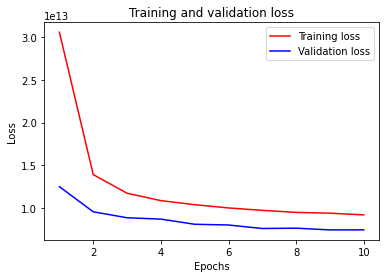

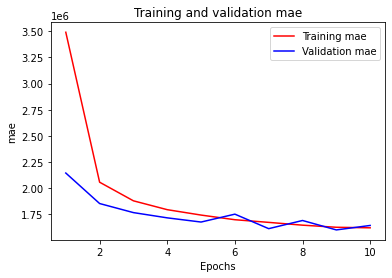

In [41]:
graphs(best_history)

In [43]:
kpredicted_x = best_model.predict(X_test)
kpredicted_x = np.reshape(kpredicted_x, (kpredicted_x.shape[0]))

In [44]:
for test_index in range(30):
  print("K:", kpredicted_x[test_index], " M:", predicted_x[test_index], " True:",predicted_y.values[test_index])

K: 15473261.0  M: 14391735.0  True: 12319849
K: 8027092.0  M: 7437803.5  True: 6800000
K: 6456652.0  M: 6815665.5  True: 4650000
K: 8158849.5  M: 9216884.0  True: 1200000
K: 7827487.5  M: 10450726.0  True: 5650000
K: 12444319.0  M: 12024172.0  True: 10850000
K: 9130629.0  M: 4901596.0  True: 3649323
K: 6781549.0  M: 8861268.0  True: 4900000
K: 10612282.0  M: 10063517.0  True: 9400000
K: 6739008.5  M: 4519526.0  True: 3069381
K: 9300968.0  M: 7721276.5  True: 6000000
K: 15952026.0  M: 13874820.0  True: 13950000
K: 16891860.0  M: 17017870.0  True: 16350000
K: 9101492.0  M: 8112872.5  True: 2100000
K: 8945079.0  M: 8221878.5  True: 6900000
K: 6132643.0  M: 4458321.5  True: 3810125
K: 16397376.0  M: 11058600.0  True: 16500000
K: 10196600.0  M: 7404330.5  True: 9200000
K: 7967457.0  M: 10628870.0  True: 7655760
K: 6609751.0  M: 4631158.5  True: 3190980
K: 7759924.0  M: 4940188.5  True: 1000000
K: 6673509.0  M: 2486000.2  True: 4411384
K: 7633820.5  M: 8917460.0  True: 1000000
K: 6556488.5  

In [45]:
KK = np.corrcoef(kpredicted_x, y_test)
KK = KK[0][1]
print(f'Коэффициент корреляции моей модели: {ccc}')
print(f'Коэффициент корреляции Keras: {KK}')

Коэффициент корреляции моей модели: 0.7190510282250981
Коэффициент корреляции Keras: 0.76035987072561
